In [15]:
from SLiCAPnotebook import *
t1 = time()

prj = initProject('4-th order Linkwitz-Riley Filter') 
                             # Creates the SLiCAP libraries and the
                             # project HTML index page
fileName = 'LowPassLR.cir'
i1 = instruction()           # Creates an instance of an instruction object
i1.setCircuit(fileName)      # Checks and defines the local circuit object and
                             # resets the index page to the project index page

No errors found for circuit: 'LowPassLR' from file: 'LowPassLR.cir'.



In [16]:
# Calculate the symbolic transfer of the filter circuit                             
i1.setSource('V1')
i1.setDetector('V_out')
i1.setSimType('symbolic')
i1.setGainType('gain')
i1.setDataType('laplace')
resultLapl  = i1.execute()
transfer    = resultLapl.laplace

In [17]:
# Define the prototype filter
protoType   = sp.sympify('1/(1 + sqrt(2)*s/2/pi/f_o + (s/2/pi/f_o)^2)^2')

In [18]:
# Define the cross-over frequency of the filter and determine the circuit parameters
f_o         = sp.Symbol('f_o')
protoType   = protoType.subs(f_o, 2000)
# Calculate the circuit parameters
paramValues  = equateCoeffs(protoType, transfer, noSolve = [f_o])
print(paramValues)

{C_a: 0.000126606981959593, L_a: 0.000150052719359518, L_b: 7.50263596797589e-5, C_b: 2.81348848799096e-5}


In [19]:
# Obtain the numeric element values
# Define the circuit parameters
i1.defPars(paramValues)
i1.setSimType('numeric')
elementValues = i1.getElementValue(['C1', 'C2', 'L1', 'L2'])
print(elementValues)

{'C2': 4.68914747998493e-6, 'C1': 2.11011636599322e-5, 'L2': 0.000450158158078553, 'L1': 0.000900316316157108}


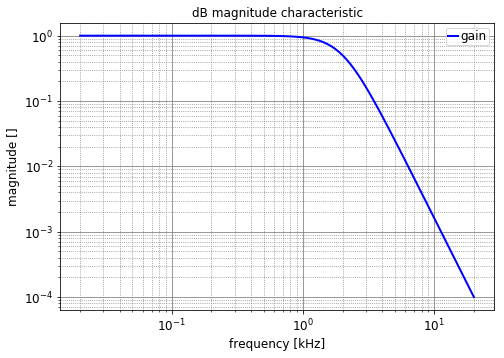

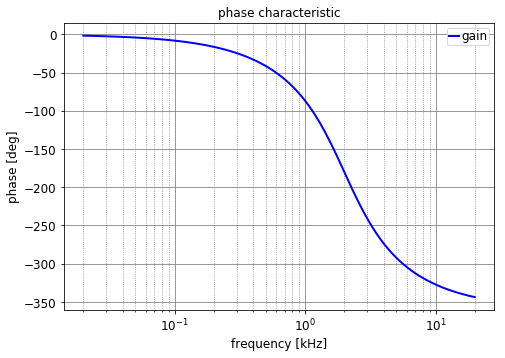

In [20]:
# Verify the behavior
i1.gainType = 'gain'
i1.dataType = 'laplace'
result      = i1.execute()
# Generate the Bode plots
figdBmag    = plotSweep('LR4dBmag', 'dB magnitude characteristic', result, 0.02, 20, 100, sweepScale='k', show=True)
figPgase    = plotSweep('LR4phase', 'phase characteristic', result, 0.02, 20, 100, funcType = 'phase', sweepScale='k', show=True)

In [21]:
# Generate a report and display the element values

htmlPage('Circuit Data')
head2html('Circuit diagram of the pototype filter')
img2html('LowPassLR.svg', 400)
netlist2html(fileName)
HTML(elementData2html(i1.circuit))

RefDes,Nodes,Refs,Model,Param,Symbolic,Numeric
C1,1 0,,C,value,$$\frac{C_{a}}{R}$$,$$2.11 \cdot 10^{-5}$$
C2,out 0,,C,value,$$\frac{C_{b}}{R}$$,$$4.689 \cdot 10^{-6}$$
L1,2 1,,L,value,$$L_{a} R$$,$$0.0009003$$
L2,1 out,,L,value,$$L_{b} R$$,$$0.0004502$$
R1,out 0,,R,value,$$R$$,$$6.0$$
V1,2 0,,V,noise,$$0$$,$$0$$
,,,,dc,$$0$$,$$0$$
,,,,value,$$1$$,$$1$$
,,,,dcvar,$$0$$,$$0$$


In [22]:
params2html(i1.circuit)

htmlPage('Report')

head2html('Prototype function')
eqn2html('P_s', protoType)

head2html('Circuit implementation')
img2html('LowPassLR.svg', 400)

head2html('Transfer of the network')
eqn2html('T_s', transfer)

head2html('Component values')
for key in list(paramValues.keys()):
    eqn2html(key, paramValues[key])
elementData2html(i1.circuit)  
params2html(i1.circuit)

head2html('Plots')
fig2html(figdBmag, 600, caption='dB magnitude of the LR4 filter transfer.')  
fig2html(figPgase, 600, caption='phase plot of the LR4 filter transfer.')   

'/mnt/DATA/SLiCAP/SLiCAP_github/SLiCAP_python2/examples/FilterDesign/html/img/LR4phase.svg'

In [23]:
# Print the total time
t2 = time()
print(t2-t1, 's')

(2.277790069580078, 's')
